In [1]:
from omegaconf import OmegaConf
from hydra import initialize, compose

# Initialize Hydra
initialize(config_path="../configs/")

# Compose the configuration
cfg = compose(config_name="collect_cube_sim")

# Convert to dict if needed
cfg_dict = OmegaConf.to_container(cfg, resolve=True)

# Display the config
print(cfg)

{'log': {'log_interval': 10, 'eval_interval': 1000, 'save_interval': 1000, 'dir': 'logdir', 'format_strings': ['stdout']}, 'robot': {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': 'perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': False}, 'env': {'obj_id': 'cube', 'joint_type': 'free', 'obj_pose_init': [0.45, 0.0, 0.02, 0.0, 0.0, 0.0, 1.0], 'obj_pose_noise_dict': {'x': {'min': -0.2, 'max': 0.2}, 'y': {'min': -0.2, 'max': 0.2}, 'yaw': {'min': -0.785, 'max': 0.78}}, 'obs_keys': ['lowdim_ee', 'lowdim_qpos', 'obj_pose'], 'safety_penalty': 0.0, 'color_track': 'red', 'filter': False, 'flatten': 

/tmp/ipykernel_3689826/653969863.py:5: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="../configs/")
/home/marius/miniforge3/envs/robomimic/lib/python3.8/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'collect_cube_sim': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [2]:
from robot.sim.vec_env.vec_env import make_env
from utils.experiment import hydra_to_dict

cfg.robot.visual_dr = True
cfg.robot.calibration_file = "../perception/cameras/calibration/logs/aruco/most_recent_calib.json"

env = make_env(
        robot_cfg_dict=hydra_to_dict(cfg.robot),
        env_cfg_dict=hydra_to_dict(cfg.env),
        seed=cfg.seed,
        device_id=0,
        verbose=True,
    )

obs = env.reset()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/marius/miniforge3/envs/robomimic/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


robot config {'control_hz': 10, 'blocking_control': False, 'DoF': 6, 'gripper': True, 'robot_type': 'panda', 'randomize_ee_on_reset': 0.0, 'pause_after_reset': False, 'qpos': True, 'ee_pos': True, 'imgs': True, 'normalize': False, 'ip_address': None, 'max_path_length': 70, 'camera_model': None, 'camera_names': ['front'], 'camera_resolution': [480, 640], 'calibration_file': '../perception/cameras/calibration/logs/aruco/most_recent_calib.json', 'model_name': 'base_franka', 'on_screen_rendering': False, 'visual_dr': True}
Object pose: [0.4695254015709299, 0.08607574654896777, 0.02, 0.9968682977818536, 0.0, -0.0, 0.07907968688297701] - seed 0


Object pose: [0.45841464248165176, -0.17826480466429856, 0.02, 0.9722803763183907, 0.0, 0.0, -0.23381802716251074] - seed 0


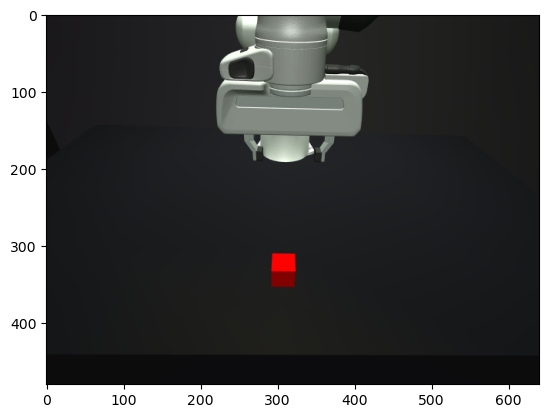

In [8]:
import matplotlib.pyplot as plt
env.reset()
plt.imshow(env.render())

In [4]:
# # what's happening under the hood:

# # initialize randomization -> stores original setting
# env.unwrapped._robot.init_randomize()

# # randomize and apply
# env.unwrapped._robot.randomize()
# env.reset()

# plt.imshow(env.render())